In [1]:
#1 Tran Dinh Son
#trandinhson3086@gmail.com
#Chonnam National University

## Import libraries

In [34]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout
from keras.optimizers import SGD

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import time
import numpy as np
import matplotlib.pyplot as plt

## Data

In [35]:
#the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28)
x_test = x_test.reshape(10000, 28, 28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print('Number of training samples : ', x_train.shape[0])
print('Number of testing samples:', x_test.shape[0])

# 10 class from 0 to 9: 0 1 2 3.. 9
num_classes = 10
#convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Number of training samples :  60000
Number of testing samples: 10000


# 1. MLP

In [36]:

# 28x28 MNIST image
input_image = Input(shape=(28, 28), name='Input')

# matrix ---> vector
x = Flatten(name='flatten')(input_image)

# FC layers + dropout
x = Dense(units=512, activation='relu', name='fc1')(x)
x = Dropout(rate=0.2, name='dropout1')(x)

x = Dense(units=512, activation='relu', name='fc2')(x)
x = Dropout(rate=0.2, name='dropout2')(x)

x = Dense(units=512, activation='relu', name='fc3')(x)
x = Dropout(rate=0.2, name='dropout3')(x)

output_label = Dense(units=num_classes, activation='softmax', name='fc4_10ways_softmax')(x)

# define model
model = Model(inputs=input_image, outputs=output_label, name='mnist_mlp')

# print model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               401920    
_________________________________________________________________
dropout1 (Dropout)           (None, 512)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 512)               262656    
_________________________________________________________________
dropout2 (Dropout)           (None, 512)               0         
_________________________________________________________________
fc3 (Dense)                  (None, 512)               262656    
__________

## Declare model

In [37]:

# declare learning rate, loss function, and model metric
loss = 'categorical_crossentropy'
lr = 0.01
model.compile(loss=loss, optimizer=SGD(lr=lr), metrics=['accuracy'])

# train the model
batch_size = 128
epochs = 30

starting_time = time.time()
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size,
                    epochs=epochs)
print('> training time is %.4f minutes' % ((time.time() - starting_time)/60))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 153us/step - loss: 1.3766 - acc: 0.6199 - val_loss: 0.5353 - val_acc: 0.8543
Epoch 2/30
60000/60000 [==============================] - 9s 153us/step - loss: 0.5598 - acc: 0.8317 - val_loss: 0.3612 - val_acc: 0.8970
Epoch 3/30
60000/60000 [==============================] - 9s 150us/step - loss: 0.4322 - acc: 0.8710 - val_loss: 0.3031 - val_acc: 0.9112
Epoch 4/30
60000/60000 [==============================] - 9s 150us/step - loss: 0.3750 - acc: 0.8897 - val_loss: 0.2702 - val_acc: 0.9217
Epoch 5/30
60000/60000 [==============================] - 9s 151us/step - loss: 0.3363 - acc: 0.9021 - val_loss: 0.2461 - val_acc: 0.9273
Epoch 6/30
60000/60000 [==============================] - 9s 156us/step - loss: 0.3076 - acc: 0.9081 - val_loss: 0.2296 - val_acc: 0.9326
Epoch 7/30
60000/60000 [==============================] - 9s 152us/step - loss: 0.2851 - acc: 0.9161 - val_loss: 0.2125 - 

In [38]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 102us/step
Test loss: 0.09469581072451547
Test accuracy: 0.9704


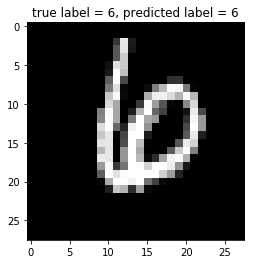

In [39]:
# select a test image randomly
random_test_index = np.random.choice(x_test.shape[0], size=1)[0]
test_img = x_test[random_test_index]
test_label = np.argmax(y_test[random_test_index])

# predict test image with trained model
pred_label = model.predict(np.expand_dims(test_img, axis=0))
pred_label = np.argmax(pred_label)

plt.imshow(test_img, cmap='gray')
plt.title('true label = %d, predicted label = %d' % (test_label, pred_label))
plt.show()

# 2. Decision Tree

In [40]:
import time
from sklearn import tree
from time import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:

t0 = time()
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(x_train.reshape(-1,28*28), y_train)
print('Time elapsed: %.2fs' % (time()-t0))

Time elapsed: 32.76s


## Run the Prediction

In [44]:
pred_dt = clf_dt.predict(x_test.reshape(-1,28*28))
print('Predicted', len(pred_dt), "digits with ccuracy: {0:.2f}%".format(accuracy_score(y_test, pred_dt)))

Predicted 10000 digits with ccuracy: 0.88%
